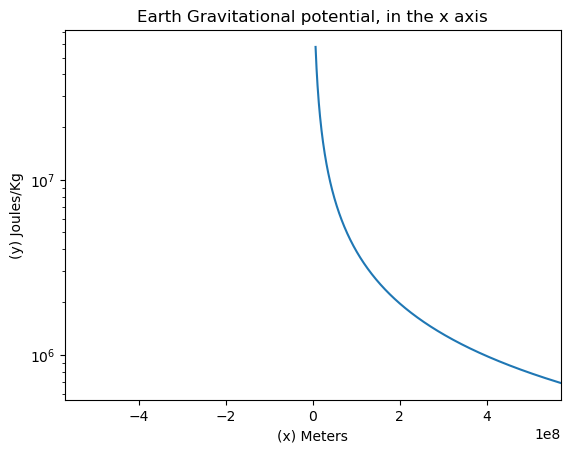

In [30]:
import matplotlib.pyplot as plt 
import math as math 
import numpy as np 

G=6.67*10**-11 #  (m^3*s^2)/kg/ Gravitational constant
R_earth= 6378000 # m / Radius of the earth, as a perfect sphere
Distance_E_M=3.8*(10**8)# m/ Distance Earth to moon, as perfect spheres
Mass_Earth= 5.9*(10**24)# Kg/ Mass of the earth
Samples=1000 # Samples to generate in each linespace


def V(x_Coordinate,y_coordinate,mass):       #Gravitational potential of a mass as a function of position, and Mass 
    denom= np.sqrt(x_Coordinate**2+y_coordinate**2)
    r_safe = np.where(denom>R_earth,denom,np.nan)
    return -G*mass/r_safe
    
 





x=np.linspace(0,1.5*Distance_E_M,Samples) 
GravPotential_yconstant= abs(V(x,0,Mass_Earth))

fig,ax=plt.subplots() 
ax.plot(x,GravPotential_yconstant) 
ax.set_xlim(-1.5*Distance_E_M,1.5*Distance_E_M)
ax.set_xlabel("(x) Meters")
ax.set_ylabel("(y) Joules/Kg")
plt.title("Earth Gravitational potential, in the x axis")
plt.yscale("log")
plt.show() 






    


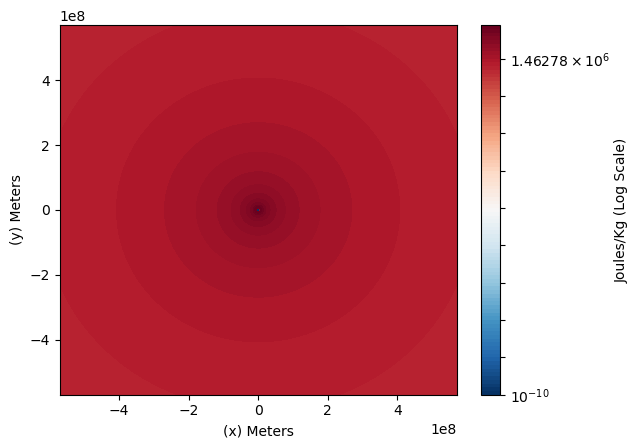

In [31]:
#Using constants defined before

import matplotlib.pyplot as plt 
import math as math 
import numpy as np 

G=6.67*10**-11 #  (m^3*s^2)/kg/ Gravitational constant
R_earth= 6378000 # m / Radius of the earth, as a perfect sphere
Distance_E_M=3.8*(10**8)# m/ Distance Earth to moon, as perfect spheres
Mass_Earth= 5.9*(10**24)# Kg/ Mass of the earth
Samples=1000 # Samples to generate in each linespace

def V(x_Coordinate,y_coordinate,mass):       #Gravitational potential of a mass as a function of position, and Mass 
    denom= np.sqrt(x_Coordinate**2+y_coordinate**2)
    r_safe = np.where(denom>R_earth,denom,np.nan)
    return -G*mass/r_safe


x=np.linspace(-1.5*Distance_E_M,1.5*Distance_E_M,Samples) 
y=np.linspace(-1.5*Distance_E_M,1.5*Distance_E_M,Samples)
X,Y=np.meshgrid(x,y) #Create a 2d array of x,y

GravPot_x_and_y=abs(V(X,Y,Mass_Earth))  # The potential graph as a function of X and Y, and the erath mass, using the functui
GravPot_x_and_y = np.nan_to_num(GravPot_x_and_y, nan=1e-10, posinf=1e-10)


fig,ax=plt.subplots()
plt.scatter(0, 0, color="white", edgecolors="black", s=100, marker="o", label="Earth")
contour_levels = np.logspace(np.log10(GravPot_x_and_y.min()),np.log10(GravPot_x_and_y.max()), 100)
contour=ax.contourf(X, Y, GravPot_x_and_y, levels=contour_levels,cmap='RdBu_r', norm=LogNorm())
ax.set_xlabel("(x) Meters")
ax.set_ylabel("(y) Meters")
cbar = plt.colorbar(contour)  
cbar.set_label("Joules/Kg (Log Scale)")
plt.show()
                                 
                                      
                                 



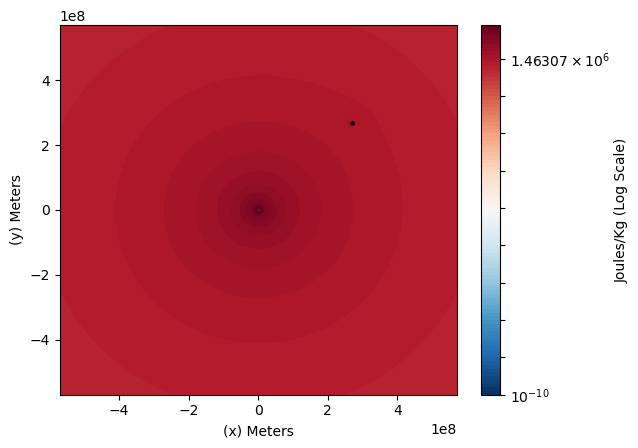

In [32]:
import matplotlib.pyplot as plt 
import math as math 
import numpy as np 
from matplotlib.colors import LogNorm

G=6.67*10**-11 #  (m^3*s^2)/kg/ Gravitational constant
R_earth= 6378000 # m / Radius of the earth, as a perfect sphere
Distance_E_M=3.8*(10**8)# m/ Distance Earth to moon, as perfect spheres
Mass_Earth= 5.9*(10**24)# Kg/ Mass of the earth
Samples=1000 # Samples to generate in each linespace
R_moon=1737000# m/ Radius of the moon as a perfect sphere
Mass_Moon= 7.3*(10**22)# Mass of the moon


#New func for potential of moon and earth this can be used so that moon is in origin
def V_moonearth(earth_x, earth_y, moon_x, moon_y, m_earth, m_moon, point_x, point_y): 
    denom_Earth=np.sqrt((point_x-earth_x)**2 +(point_y-earth_y)**2)
    denom_Moon=np.sqrt((moon_x-point_x)**2+(moon_y-point_y)**2)
    r_EarthSafe= np.where(denom_Earth>R_earth, denom_Earth,np.nan) 
    r_MoonSafe= np.where(denom_Moon>R_moon, denom_Moon,np.nan)
    return (-G*m_earth/r_EarthSafe -G*m_moon/r_MoonSafe) 
#earth_x, position of earth x; moon_x, position moon x; point_x Point we are evaluating the potential; m_earth; Mass of earth; It is trivial what the other values mean 

x=np.linspace(-1.5*Distance_E_M,1.5*Distance_E_M,Samples) 
y=np.linspace(-1.5*Distance_E_M,1.5*Distance_E_M,Samples)
X,Y= np.meshgrid(x,y) 


E_x=0   #Earth Given Position
E_y=0 

#THe moon position with respect to earth, will be calculated using the period of the moon over 27 days, aproximating the 27.3 Sideral Period

Period=27 #Days
angle= 2*np.pi/Period 

def Moon_x_coordinate(time):          #This function gives the X coordinate of the moon with a starting point in the asked question
   return Distance_E_M*np.cos(angle*time+(np.pi/4))

def Moon_y_coordinate(time):         #This function gives the Y coordinate of the moon with a starting point in the asked question
    return Distance_E_M*np.sin(angle*time+(np.pi/4))  
        
t_days=0  # Time variable/ For period purposes you can switch it from 0 to 27/Units: Days

M_x=Moon_x_coordinate(t_days)# If given aproximate distances of moon-earth at every 27 days of its periods, we could create an aproximate elipse, getting rid of the perfect circle aproximation
M_y=Moon_y_coordinate(t_days)
 

Potential_Moon_Earth_System= abs(V_moonearth(E_x, E_y, M_x, M_y, Mass_Earth, Mass_Moon, X, Y))  #Potential of Earth and moon in a 2d graphs, as an absolute value
Potential_Moon_Earth_System = np.nan_to_num(Potential_Moon_Earth_System, nan=1e-10, posinf=1e-10)

fig,ax=plt.subplots()
plt.scatter(0, 0, color="white", edgecolors="black", s=100, marker="o", label="Earth")
contour_levels = np.logspace(np.log10(Potential_Moon_Earth_System.min()),np.log10(Potential_Moon_Earth_System.max()), 100)
contour=ax.contourf(X, Y, Potential_Moon_Earth_System, levels=contour_levels,cmap='RdBu_r', norm=LogNorm())
plt.scatter(M_x, M_y, color="black", edgecolors="black", s=5, marker="o", label="Moon")
ax.set_xlabel("(x) Meters")
ax.set_ylabel("(y) Meters")
cbar = plt.colorbar(contour)  
cbar.set_label("Joules/Kg (Log Scale)")
plt.show()
                                 
                                 

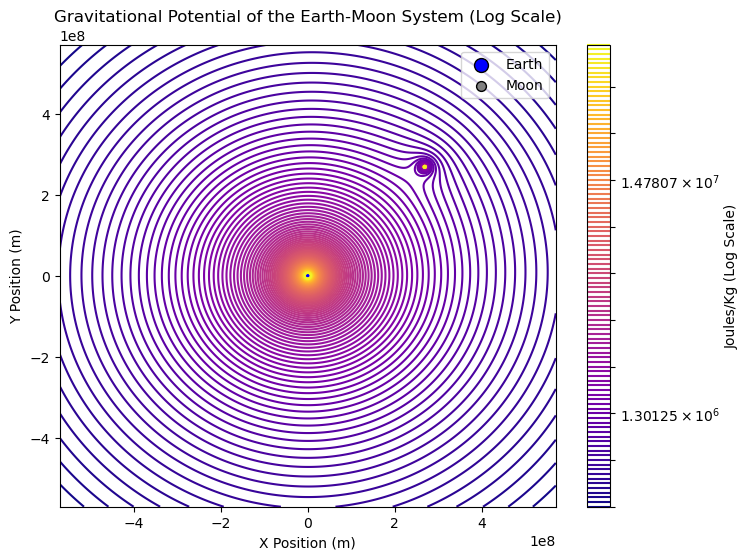

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling

# Constants
G=6.67*10**-11 #  (m^3*s^2)/kg/ Gravitational constant
R_earth= 6378000 # m / Radius of the earth, as a perfect sphere
Distance_E_M=3.8*(10**8)# m/ Distance Earth to moon, as perfect spheres
Mass_Earth= 5.9*(10**24)# Kg/ Mass of the earth
Samples=1000 # Samples to generate in each linespace
R_moon=1737000# m/ Radius of the moon as a perfect sphere
Mass_Moon= 7.3*(10**22)# Mass of the moon


# Function to calculate gravitational potential FROM 2 bodies, and their respective positions
def V_moonearth(earth_x, earth_y, moon_x, moon_y, m_earth, m_moon, point_x, point_y): 
    denom_Earth = np.sqrt((point_x - earth_x)**2 + (point_y - earth_y)**2)
    denom_Moon = np.sqrt((moon_x - point_x)**2 + (moon_y - point_y)**2)
    
    # Avoid singularities inside Earth and Moon
    r_EarthSafe = np.where(denom_Earth > R_earth, denom_Earth, np.nan) 
    r_MoonSafe = np.where(denom_Moon > R_moon, denom_Moon, np.nan)

    return (-G * m_earth / r_EarthSafe - G * m_moon / r_MoonSafe) 

# Generate grid
x = np.linspace(-1.5 * Distance_E_M, 1.5 * Distance_E_M, 1000) 
y = np.linspace(-1.5 * Distance_E_M, 1.5 * Distance_E_M, 1000)
X, Y = np.meshgrid(x, y) 

# Earth position
E_x = 0 
E_y = 0 
#Moon position

Period = 27  # Days
angle = 2 * np.pi / Period 

# Moon's position as a function of time
def Moon_x_coordinate(time):          
   return Distance_E_M * np.cos(angle * time + (np.pi / 4))

def Moon_y_coordinate(time):
    return Distance_E_M * np.sin(angle * time + (np.pi / 4))

# Time variable (set to 0 days)
t_days = 0  
M_x = Moon_x_coordinate(t_days)
M_y = Moon_y_coordinate(t_days)

#Potential absolute value
Potential_Moon_Earth_System = abs(V_moonearth(E_x, E_y, M_x, M_y, Mass_Earth, Mass_Moon, X, Y))
Potential_Moon_Earth_System = np.nan_to_num(Potential_Moon_Earth_System, nan=np.nanmax(Potential_Moon_Earth_System), posinf=np.nanmax(Potential_Moon_Earth_System))#Changing the np.nan to a number

fig, ax = plt.subplots(figsize=(8, 6))


contour_levels = np.logspace(np.log10(Potential_Moon_Earth_System.min()),np.log10(Potential_Moon_Earth_System.max()), 100)

# Use contourf with a logarithmic normalization
contour = ax.contour(X, Y, Potential_Moon_Earth_System, levels=contour_levels,cmap='plasma', norm=LogNorm())

# Mark the Earth and Moon's positions as points
ax.scatter(E_x, E_y, color="blue", edgecolors="black", s=100, marker="o", label="Earth")
ax.scatter(M_x, M_y, color="gray", edgecolors="black", s=50, marker="o", label="Moon")
cbar = plt.colorbar(contour)  
cbar.set_label("Joules/Kg (Log Scale)")

# Labels and title
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_title("Gravitational Potential of the Earth-Moon System (Log Scale)")

# Show plot
plt.legend()
plt.show()

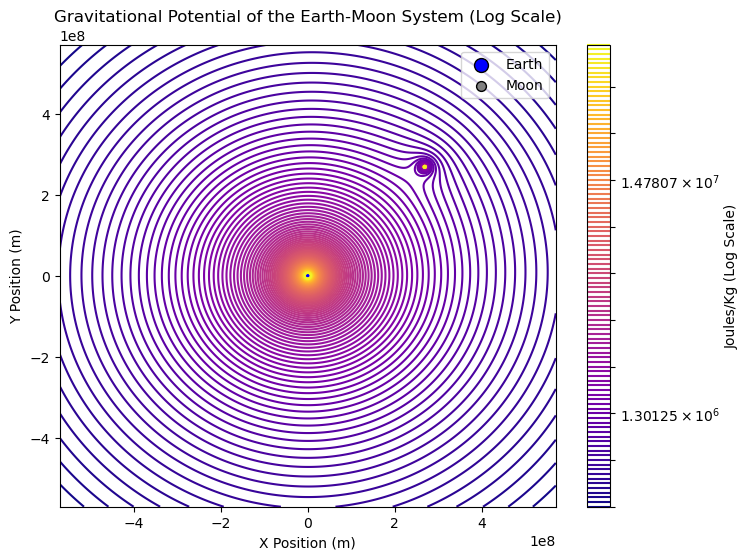

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  

# Constants
G = 6.67 * 10**-11  # Gravitational constant (m^3/kg/s^2)
R_earth = 6378000  # Radius of the Earth (m)
Distance_E_M = 3.8 * 10**8  # Distance from Earth to Moon (m)
Mass_Earth = 5.9 * 10**24  # Mass of Earth (kg)
Samples = 100  # Grid samples
R_moon = 1737000  # Radius of the Moon (m)
Mass_Moon = 7.3 * 10**22  # Mass of the Moon (kg)
Mass_Apollo_Command_Module = 5500  # Mass of the Apollo module (kg)

# Function to calculate gravitational force from Earth and Moon
def Gravitational_Force_M_E_on_SaturnV(earth_x, earth_y, moon_x, moon_y, m_earth, m_moon, point_x, point_y, Mass_SaturnV): 
    denom_Earth = np.sqrt((point_x - earth_x)**2 + (point_y - earth_y)**2)
    denom_Moon = np.sqrt((moon_x - point_x)**2 + (moon_y - point_y)**2)
    
    # Avoid singularities inside Earth and Moon
    r_EarthSafe = np.where(denom_Earth > R_earth, denom_Earth, np.nan) 
    r_MoonSafe = np.where(denom_Moon > R_moon, denom_Moon, np.nan)

    Fx_Earth = (-G * m_earth * Mass_SaturnV / r_EarthSafe**3) * (point_x - earth_x)
    Fy_Earth = (-G * m_earth * Mass_SaturnV / r_EarthSafe**3) * (point_y - earth_y)

    Fx_Moon = (-G * m_moon * Mass_SaturnV / r_MoonSafe**3) * (point_x - moon_x)
    Fy_Moon = (-G * m_moon * Mass_SaturnV / r_MoonSafe**3) * (point_y - moon_y)

    Fx = Fx_Earth + Fx_Moon
    Fy = Fy_Earth + Fy_Moon
    return Fx, Fy


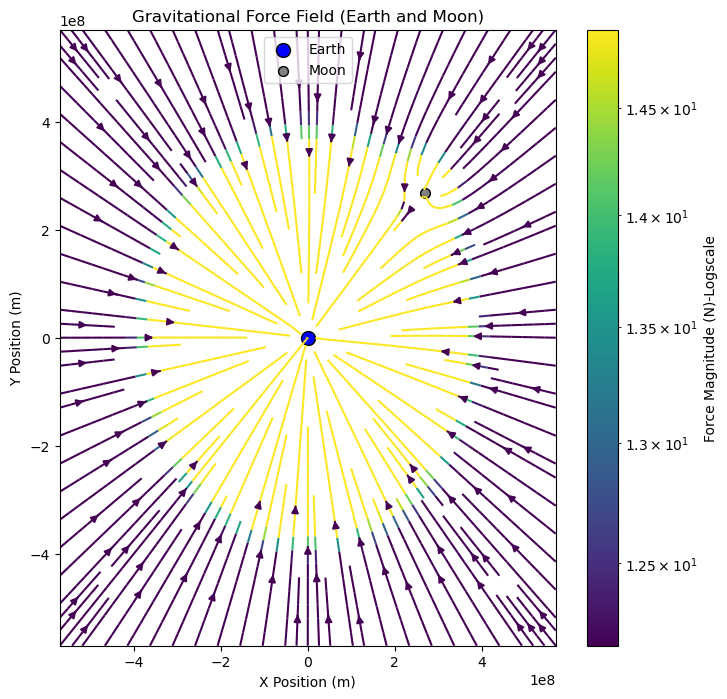

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  

# Constants
G = 6.67 * 10**-11  # Gravitational constant (m^3/kg/s^2)
R_earth = 6378000  # Radius of the Earth (m)
Distance_E_M = 3.8 * 10**8  # Distance from Earth to Moon (m)
Mass_Earth = 5.9 * 10**24  # Mass of Earth (kg)
Samples = 100  # Grid samples
R_moon = 1737000  # Radius of the Moon (m)
Mass_Moon = 7.3 * 10**22  # Mass of the Moon (kg)
Mass_Apollo_Command_Module = 5500  # Mass of the Apollo module (kg)

# Function to calculate gravitational force from Earth and Moon
def Gravitational_Force_M_E_on_SaturnV(earth_x, earth_y, moon_x, moon_y, m_earth, m_moon, point_x, point_y, Mass_SaturnV): 
    denom_Earth = np.sqrt((point_x - earth_x)**2 + (point_y - earth_y)**2)
    denom_Moon = np.sqrt((moon_x - point_x)**2 + (moon_y - point_y)**2)
    
    # Avoid singularities inside Earth and Moon
    r_EarthSafe = np.where(denom_Earth > R_earth, denom_Earth, np.nan) 
    r_MoonSafe = np.where(denom_Moon > R_moon, denom_Moon, np.nan)

    Fx_Earth = (-G * m_earth * Mass_SaturnV / r_EarthSafe**3) * (point_x - earth_x)
    Fy_Earth = (-G * m_earth * Mass_SaturnV / r_EarthSafe**3) * (point_y - earth_y)

    Fx_Moon = (-G * m_moon * Mass_SaturnV / r_MoonSafe**3) * (point_x - moon_x)
    Fy_Moon = (-G * m_moon * Mass_SaturnV / r_MoonSafe**3) * (point_y - moon_y)

    Fx = Fx_Earth + Fx_Moon
    Fy = Fy_Earth + Fy_Moon
    return Fx, Fy

# Moon's position as a function of time
Period = 27  # Days
angle = 2 * np.pi / Period 

def Moon_x_coordinate(time):          
   return Distance_E_M * np.cos(angle * time + (np.pi / 4))

def Moon_y_coordinate(time):
    return Distance_E_M * np.sin(angle * time + (np.pi / 4))

# Time variable (set to 0 days)
t_days = 0  
M_x = Moon_x_coordinate(t_days)
M_y = Moon_y_coordinate(t_days)

# Define Earth position
E_x, E_y = 0, 0  

# Generate grid
x = np.linspace(-1.5 * Distance_E_M, 1.5 * Distance_E_M, Samples) 
y = np.linspace(-1.5 * Distance_E_M, 1.5 * Distance_E_M, Samples)
X, Y = np.meshgrid(x, y) 

# Vector of the force x, and y from Moon and Earth 
Fx, Fy = Gravitational_Force_M_E_on_SaturnV(E_x, E_y, M_x, M_y, Mass_Earth, Mass_Moon, X, Y, Mass_Apollo_Command_Module)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
strm = ax.streamplot(X, Y, Fx, Fy, color=np.hypot(Fx, Fy), cmap="viridis", norm=LogNorm(),density=1.5)

# Add Earth and Moon
ax.scatter(E_x, E_y, color="blue", edgecolors="black", s=100, marker="o", label="Earth")
ax.scatter(M_x, M_y, color="gray", edgecolors="black", s=50, marker="o", label="Moon")

# Label and title
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_title("Gravitational Force Field (Earth and Moon)")
plt.colorbar(strm.lines, label="Force Magnitude (N)-Logscale")
ax.legend()
plt.show()


In [6]:
#Problem 4.a
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

Wet_Mass_S=2.8*(10**6) # kg
Dry_Mass_S =7.5*(10**5) #kg
Burn_Rate_S=1.3*(10**4) #kg/s

def Burnt_Time(inital_mass,final_mass,Burn_rate):
    return (inital_mass-final_mass)/Burn_rate

Burnt_Time_SaturnV_S1= Burnt_Time(Wet_Mass_S,Dry_Mass_S,Burn_Rate_S) 
print(Burnt_Time_SaturnV_S1)
    


157.69230769230768


In [4]:
#Problem 4.2 

import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

Gravity= 9.8# m/s^2
Exhaust_V_Sat= 2.4 * 10**3 #m/s
Burn_Rate_Sat= 1.3 * 10**4 #kg/s
Wet_Mass_Sat=2.8* 10**6 #kg
Dry_Mass_Sat=7.5* 10**5 #kg

def velocity_change(Exhaust_v, initial_mass, gravity, time, burn_rate, Dry_mass):    
    final_mass = Final_mass(initial_mass, burn_rate, time)  # Compute final mass once
    
    if final_mass <= Dry_mass:  
        return 0
    else:
        return Exhaust_v * np.log(initial_mass / final_mass) - (gravity * time)
    
    
    

In [7]:
#Problem 4.3 

import numpy as np
import scipy.integrate as integrate
Gravity= 9.8# m/s^2
Exhaust_V_Sat= 2.4 * 10**3 #m/s
Burn_Rate_Sat= 1.3 * 10**4 #kg/s
Wet_Mass_Sat=2.8* 10**6 #kg
Dry_Mass_Sat=7.5* 10**5 #kg

# Function to calculate final mass at time t
def Final_mass(initial_mass, burn_rate, time):  
    return initial_mass - (burn_rate * time)

# Function for velocity change
def velocity_change(time, Exhaust_v, initial_mass, gravity, burn_rate, Dry_mass):    
    final_mass = Final_mass(initial_mass, burn_rate, time)  # Compute final mass at time t
    
    if final_mass <= Dry_mass:  # Ensure it does not go below dry mass
        return 0
    else:
        return Exhaust_v * np.log(initial_mass / final_mass) - (gravity * time)

# Function to compute altitude by integrating  over time
def altitude(Exhaust_v, initial_mass, gravity, burn_rate, Dry_mass, T):
    
    # Final function for integration where time varies
    def velocity_change_wrapper(time):
        return velocity_change(time, Exhaust_v, initial_mass, gravity, burn_rate, Dry_mass)

    h, _ = integrate.quad(velocity_change_wrapper, 0, T)  # Integrate Δv(t) over time
    return h

Altitude_Sat=altitude(Exhaust_V_Sat,Wet_Mass_Sat,Gravity,Burn_Rate_Sat,Dry_Mass_Sat,Burnt_Time_SaturnV_S1) 
print(Altitude_Sat)


74218.31445319064
